# KARIM_MANISHA___ HW1___CAP_5625_002

## 1. Read dataset

For this project, I'm focusing on postoperative patient data.  This dataset describes the state of the patient following surgery. This database's classification task is to decide which postoperative recovery area patients should be transferred to after surgery.  

Eight features are included in it: 'id', 'L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT', and the label class is 'decision'. The dataset has 90 instances.

The 'id' feature has been removed from the dataframe since it is irrelevant. Three unique values made up the label class: S, I, and A. Since there are just two rows with an I value, this label will be treated as a noise by the machine learning algorithm. Therefore, it is advisable to remove these rows.

There were three null values in total for the 'COMFORT' attribute. As demonstrated by the charts, the null value for the A and S labels would be 10. The null rows were removed since the null values only made up 2.27% of the entire dataset and the filled value's probability was comparable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
  
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv("C:\Class\Computational Foundation of AI\csv_result-postoperative-patient-data.csv")
df.head()

id L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL     BP-STBL COMFORT  \
0   1    mid    low  excellent   mid    stable    stable      stable      15   
1   2    mid   high  excellent  high    stable    stable      stable      10   
2   3   high    low  excellent  high    stable    stable  mod-stable      10   
3   4    mid    low       good  high    stable  unstable  mod-stable      15   
4   5    mid    mid  excellent  high    stable    stable      stable      10   

  decision  
0        A  
1        S  
2        A  
3        A  
4        A

In [3]:
df.columns

Index(['id', 'L-CORE', 'L-SURF', 'L-O2', 'L-BP', 'SURF-STBL', 'CORE-STBL',
       'BP-STBL', 'COMFORT', 'decision'],
      dtype='object')

In [4]:
df.drop(['id'], axis = 1, inplace = True)

In [5]:
df

L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL     BP-STBL COMFORT  \
0     mid    low  excellent   mid    stable    stable      stable      15   
1     mid   high  excellent  high    stable    stable      stable      10   
2    high    low  excellent  high    stable    stable  mod-stable      10   
3     mid    low       good  high    stable  unstable  mod-stable      15   
4     mid    mid  excellent  high    stable    stable      stable      10   
..    ...    ...        ...   ...       ...       ...         ...     ...   
85    mid    mid  excellent   mid  unstable    stable      stable      10   
86    mid    mid  excellent   mid  unstable    stable      stable      15   
87    mid    mid       good   mid  unstable    stable      stable      15   
88    mid    mid  excellent   mid  unstable    stable      stable      10   
89    mid    mid       good   mid  unstable    stable      stable      15   

   decision  
0         A  
1         S  
2         A  
3         A  
4         A  
..      ...  
85        A  
86        S  
87        A  
88        A  
89        S  

[90 rows x 9 columns]

<Axes: xlabel='decision', ylabel='count'>

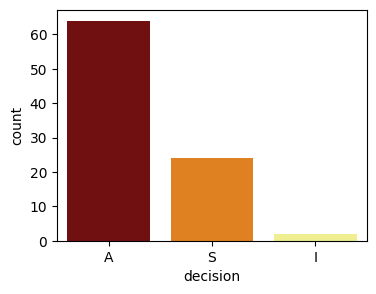

In [6]:
plt.figure( figsize = [4,3])

sns.countplot(x = 'decision', hue = 'decision', data = df, palette = 'afmhot')


In [7]:
df.drop(df[df['decision'] == 'I'].index, inplace = True)

> **Dealing with missing values**

In [8]:
df['COMFORT'] = np.where(df['COMFORT'] == '?', None, df['COMFORT'])

In [9]:
df.shape

(88, 9)

In [10]:
# Percentage of null values in a feature
(df.isna().sum()/len(df)) * 100

L-CORE       0.000000
L-SURF       0.000000
L-O2         0.000000
L-BP         0.000000
SURF-STBL    0.000000
CORE-STBL    0.000000
BP-STBL      0.000000
COMFORT      2.272727
decision     0.000000
dtype: float64

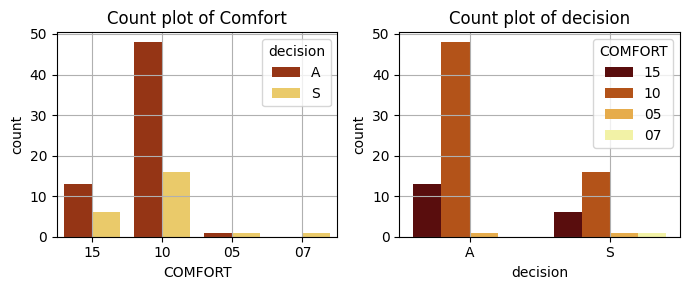

In [11]:
plt.figure(figsize = [7,3])

plt.subplot(1,2,1)
sns.countplot(x = 'COMFORT', hue = 'decision', data = df, palette = 'afmhot')
plt.title('Count plot of Comfort')
plt.grid()


plt.subplot(1,2,2)
sns.countplot(hue = 'COMFORT', x = 'decision', data = df, palette = 'afmhot')
plt.title('Count plot of decision')
plt.grid()

plt.tight_layout()


In [12]:
df.dropna(subset = ['COMFORT'], inplace = True)

### Explaratory Data Analysis

In [13]:
df.head(10)

L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL     BP-STBL COMFORT  \
0    mid    low  excellent   mid    stable    stable      stable      15   
1    mid   high  excellent  high    stable    stable      stable      10   
2   high    low  excellent  high    stable    stable  mod-stable      10   
3    mid    low       good  high    stable  unstable  mod-stable      15   
4    mid    mid  excellent  high    stable    stable      stable      10   
5   high    low       good   mid    stable    stable    unstable      15   
6    mid    low  excellent  high    stable    stable  mod-stable      05   
7   high    mid  excellent   mid  unstable  unstable      stable      10   
8    mid   high       good   mid    stable    stable      stable      10   
9    mid    low  excellent   mid  unstable    stable  mod-stable      10   

  decision  
0        A  
1        S  
2        A  
3        A  
4        A  
5        S  
6        S  
7        S  
8        S  
9        S

In [14]:
# Number of rows and columns
df.shape

(86, 9)

In [15]:
# Summary of the dataset
df.describe()

L-CORE L-SURF  L-O2 L-BP SURF-STBL CORE-STBL BP-STBL COMFORT decision
count      86     86    86   86        86        86      86      86       86
unique      3      3     2    3         2         3       3       4        2
top       mid    mid  good  mid    stable    stable  stable      10        A
freq       56     47    45   55        43        80      45      64       62

> **Histogram**

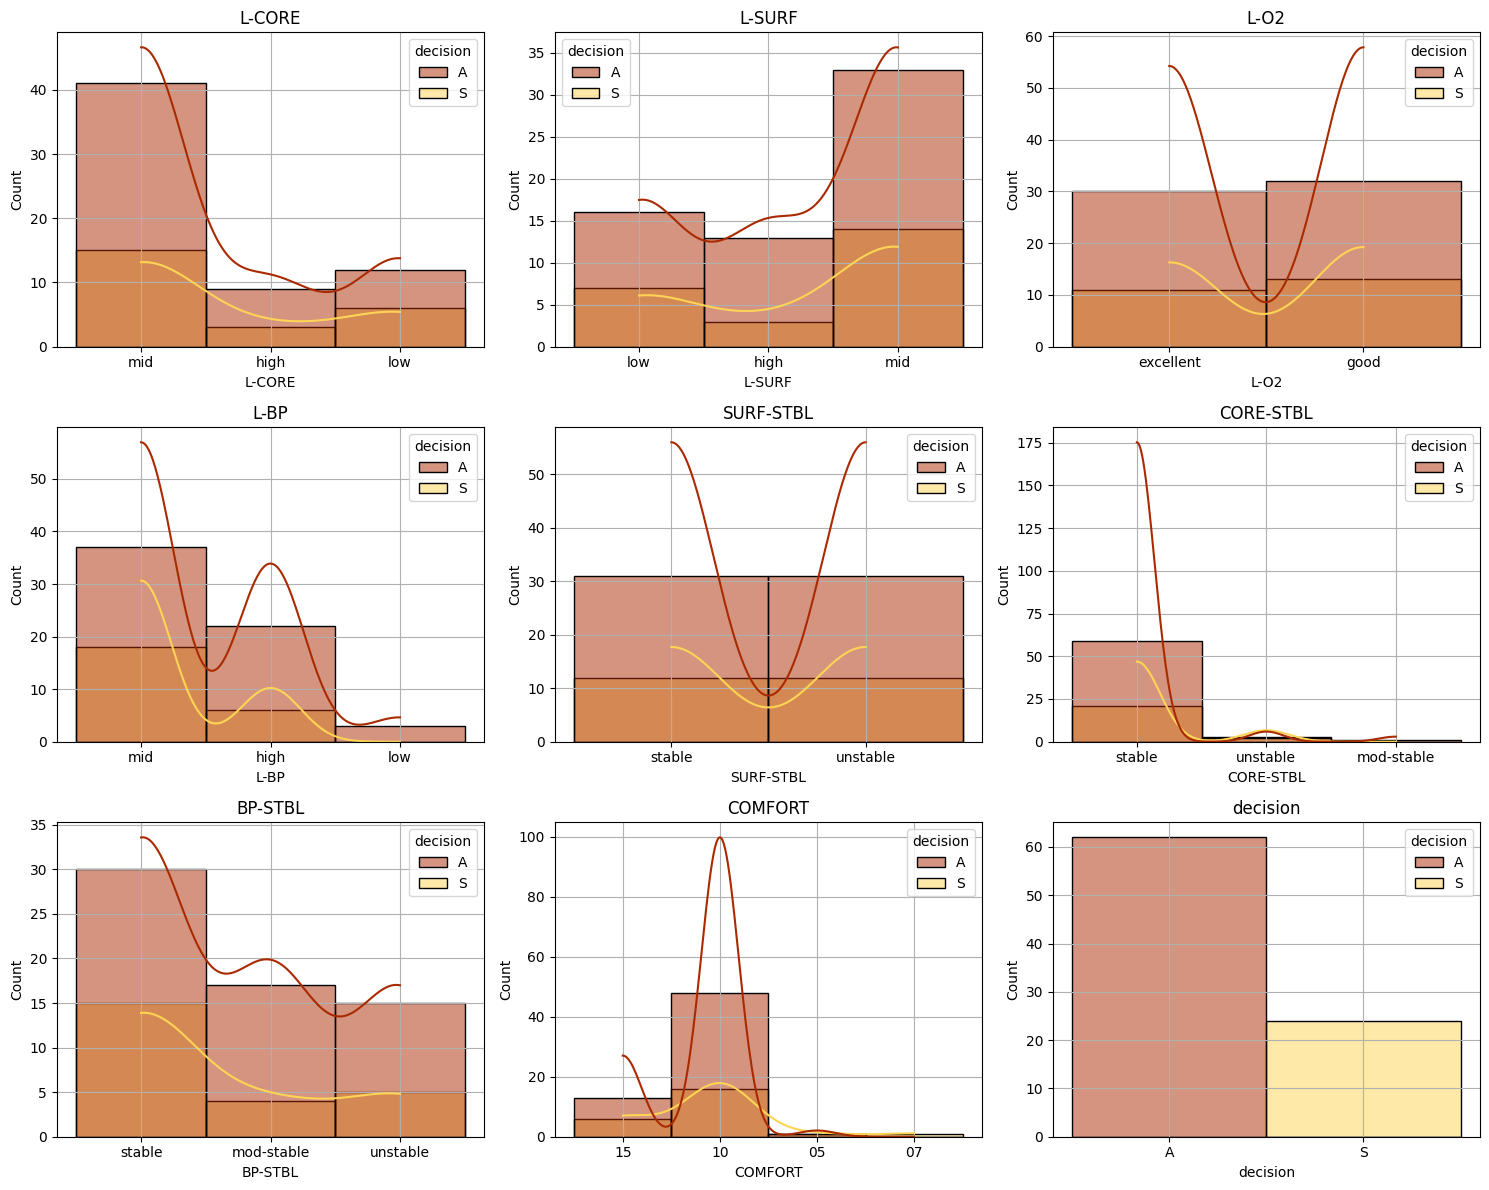

In [16]:
plt.figure(figsize = [15,12])
i = 1

name = df.columns
j = 0

for col in df:    
    plt.subplot(3, 3, i)
    sns.histplot( data = df, x = df[col], hue ='decision', palette = 'afmhot', bins = int(math.sqrt(len(df))), kde = True)
    plt.title(name[j])
    plt.tight_layout()
    plt.grid()
    
    i = i+1
    j = j+1
     

> **Countplot**

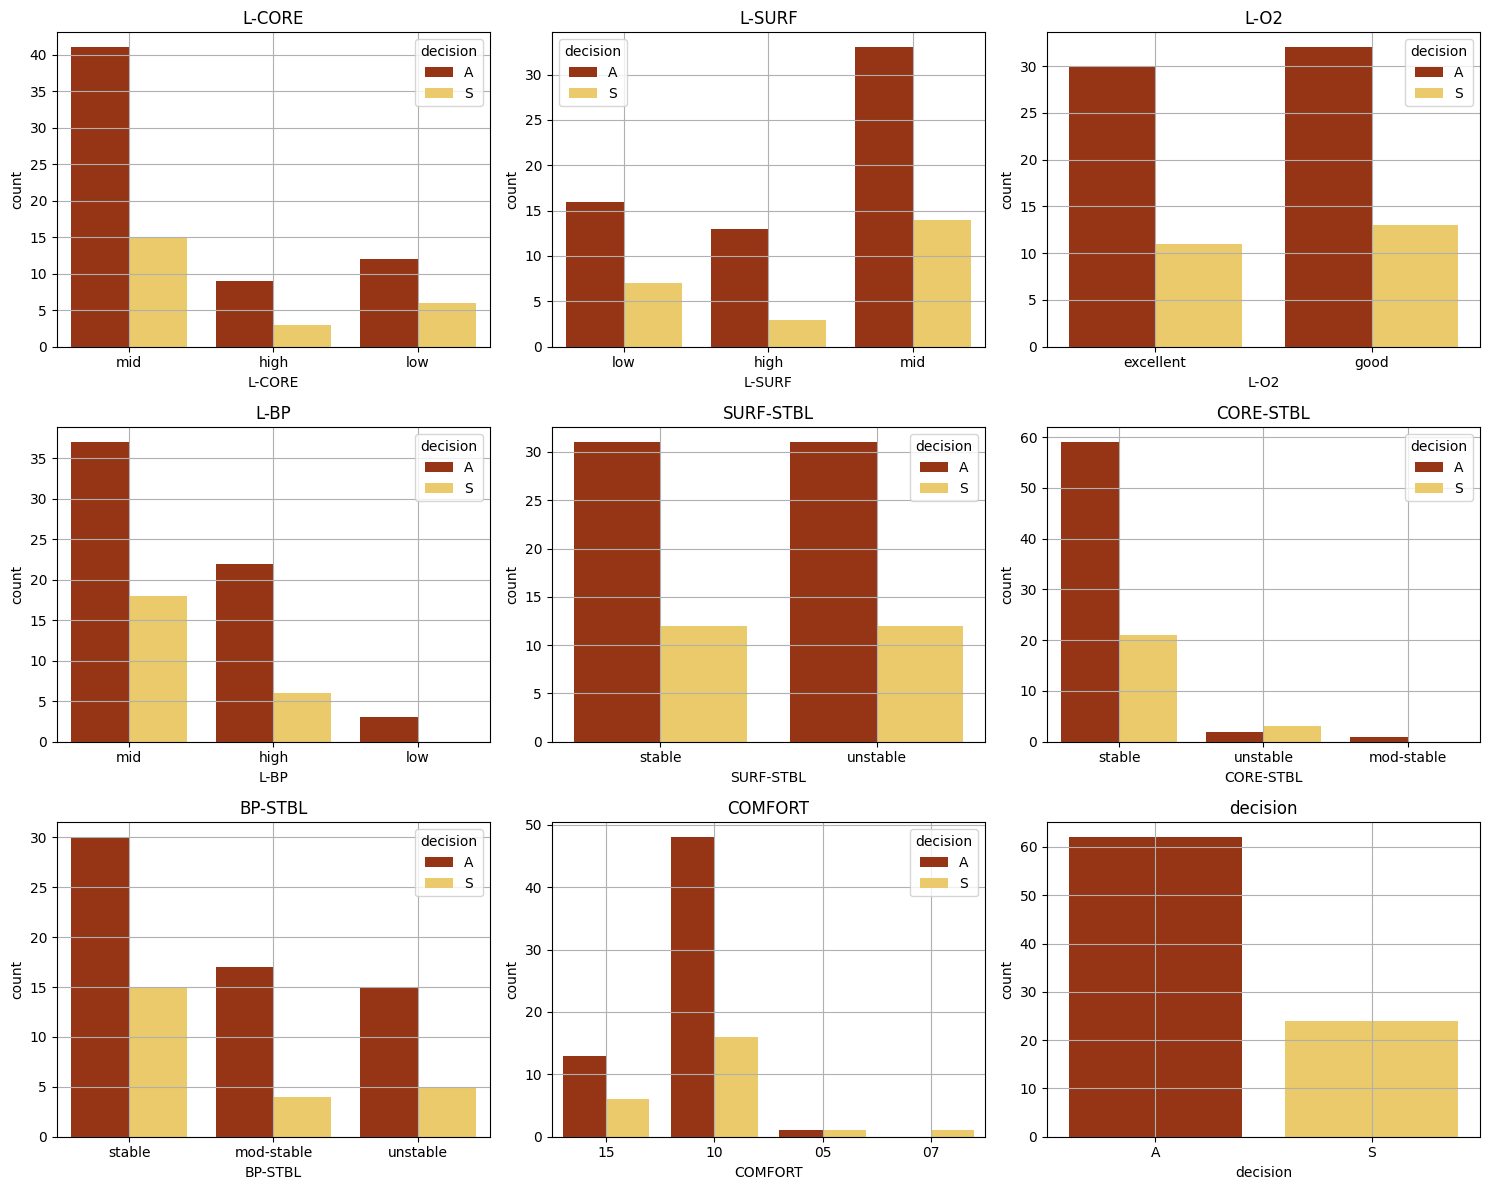

In [17]:
plt.figure(figsize = [15,12])
i = 1

name = df.columns
j = 0

for col in df:    
    plt.subplot(3, 3, i)
    sns.countplot( data = df, x = df[col], hue ='decision', palette = 'afmhot')
    plt.title(name[j])
    plt.tight_layout()
    plt.grid()
    
    i = i+1
    j = j+1
     

> **Encoding**

In [18]:
unique = []
for col in df:
  uni = df[col].unique()
  unique.append([col, uni])

unique

[['L-CORE', array(['mid', 'high', 'low'], dtype=object)],
 ['L-SURF', array(['low', 'high', 'mid'], dtype=object)],
 ['L-O2', array(['excellent', 'good'], dtype=object)],
 ['L-BP', array(['mid', 'high', 'low'], dtype=object)],
 ['SURF-STBL', array(['stable', 'unstable'], dtype=object)],
 ['CORE-STBL', array(['stable', 'unstable', 'mod-stable'], dtype=object)],
 ['BP-STBL', array(['stable', 'mod-stable', 'unstable'], dtype=object)],
 ['COMFORT', array(['15', '10', '05', '07'], dtype=object)],
 ['decision', array(['A', 'S'], dtype=object)]]

In [19]:
for col in df:
    
    df[col] = np.where((df[col] == 'low'), 0, df[col])
    df[col] = np.where((df[col] == 'mid'), 1, df[col])
    df[col] = np.where((df[col] == 'high'), 2, df[col])
    
    df[col] = np.where((df[col] == 'excellent'), 1, df[col])
    df[col] = np.where((df[col] == 'good'), 1, df[col])
    
    df[col] = np.where((df[col] == 'unstable'), 0, df[col])
    df[col] = np.where((df[col] == 'mod-stable'), 1, df[col])
    df[col] = np.where((df[col] == 'stable'), 2, df[col])
    
    df[col] = np.where((df[col] == 'A'), 0, df[col])
    df[col] = np.where((df[col] == 'S'), 1, df[col])

In [20]:
df = df.astype(int)

In [21]:
df.describe()

L-CORE     L-SURF  L-O2       L-BP  SURF-STBL  CORE-STBL    BP-STBL  \
count  86.000000  86.000000  86.0  86.000000  86.000000  86.000000  86.000000   
mean    0.930233   0.918605   1.0   1.290698   1.000000   1.872093   1.290698   
std     0.589929   0.672399   0.0   0.528400   1.005865   0.480111   0.824140   
min     0.000000   0.000000   1.0   0.000000   0.000000   0.000000   0.000000   
25%     1.000000   0.000000   1.0   1.000000   0.000000   2.000000   1.000000   
50%     1.000000   1.000000   1.0   1.000000   1.000000   2.000000   2.000000   
75%     1.000000   1.000000   1.0   2.000000   2.000000   2.000000   2.000000   
max     2.000000   2.000000   1.0   2.000000   2.000000   2.000000   2.000000   

         COMFORT   decision  
count  86.000000  86.000000  
mean   10.953488   0.279070  
std     2.315711   0.451173  
min     5.000000   0.000000  
25%    10.000000   0.000000  
50%    10.000000   0.000000  
75%    10.000000   1.000000  
max    15.000000   1.000000

In [22]:
df.head()

L-CORE  L-SURF  L-O2  L-BP  SURF-STBL  CORE-STBL  BP-STBL  COMFORT  \
0       1       0     1     1          2          2        2       15   
1       1       2     1     2          2          2        2       10   
2       2       0     1     2          2          2        1       10   
3       1       0     1     2          2          0        1       15   
4       1       1     1     2          2          2        2       10   

   decision  
0         0  
1         1  
2         0  
3         0  
4         0

### 2. Normalize

In [23]:
X = df.iloc[:, 0:8]
y = df['decision']

In [24]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [25]:
X[0:10]

array([[0.5, 0. , 0. , 0.5, 1. , 1. , 1. , 1. ],
       [0.5, 1. , 0. , 1. , 1. , 1. , 1. , 0.5],
       [1. , 0. , 0. , 1. , 1. , 1. , 0.5, 0.5],
       [0.5, 0. , 0. , 1. , 1. , 0. , 0.5, 1. ],
       [0.5, 0.5, 0. , 1. , 1. , 1. , 1. , 0.5],
       [1. , 0. , 0. , 0.5, 1. , 1. , 0. , 1. ],
       [0.5, 0. , 0. , 1. , 1. , 1. , 0.5, 0. ],
       [1. , 0.5, 0. , 0.5, 0. , 0. , 1. , 0.5],
       [0.5, 1. , 0. , 0.5, 1. , 1. , 1. , 0.5],
       [0.5, 0. , 0. , 0.5, 0. , 1. , 0.5, 0.5]])

## 3. Divide_train_test

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104,  test_size=0.40,  shuffle=True) 

In [27]:
print('Shape of X_train: ',  X_train.shape)
print('Shape of y_train: ',  y_train.shape)

print('Shape of X_test: ',  X_test.shape)
print('Shape of y_test: ',  y_test.shape)

Shape of X_train:  (51, 8)
Shape of y_train:  (51,)
Shape of X_test:  (35, 8)
Shape of y_test:  (35,)


## 4. Running Logistic Regression


Ridge regularisation, or L2, is the regularisation method that sklearn uses by default. When using this regularization, the model's accuracy is 0.77. The accuracy of the other two regularization methods, elastic-net and L1, or Lasso, was the same. L1 regularization eliminates features that aren't relevant. Every one of the eight features was taken into consideration because they all had some bearing on the conclusion. This meant that even though the penalties were different, the accuracy remained the same.  

> **Penalty = L2**

In [28]:
classifier = LogisticRegression(penalty = 'l2', solver = 'liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [29]:
print('coefficient: ',classifier.coef_)
print('interceopt: ', classifier.intercept_ )

coefficient:  [[-0.33760956 -0.27525392  0.         -0.05468329 -0.39571009 -0.30913342
   0.11015    -0.0299648 ]]
interceopt:  [-0.05897832]


In [30]:
confusion_matrix(y_test, y_pred)

array([[27,  0],
       [ 8,  0]], dtype=int64)

Text(0.5, 3.722222222222216, 'Predicted label')

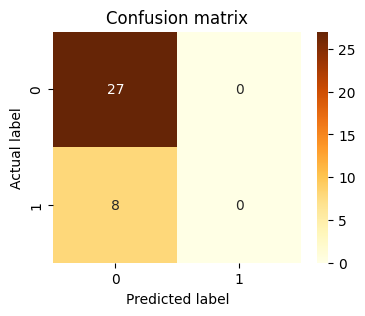

In [31]:
plt.figure(figsize = [4,3])

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='YlOrBr')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
accuracy_score(y_test, y_pred)

0.7714285714285715

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        27
           1       0.00      0.00      0.00         8

    accuracy                           0.77        35
   macro avg       0.39      0.50      0.44        35
weighted avg       0.60      0.77      0.67        35



C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> **Penalty = L1**

In [34]:
classifier = LogisticRegression(penalty = 'l1', solver = 'liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [35]:
print('coefficient: ',classifier.coef_)
print('interceopt: ', classifier.intercept_ )

coefficient:  [[-0.23650884 -0.02276693  0.          0.         -0.30215623 -0.47925155
   0.          0.        ]]
interceopt:  [0.]


In [36]:
confusion_matrix(y_test, y_pred)

array([[27,  0],
       [ 8,  0]], dtype=int64)

Text(0.5, 3.722222222222216, 'Predicted label')

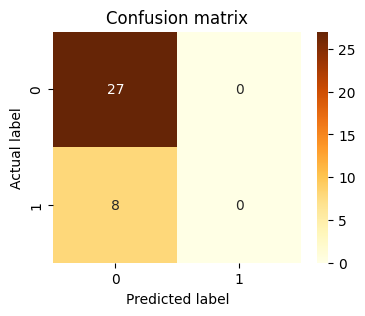

In [37]:
plt.figure(figsize = [4,3])

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='YlOrBr')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
accuracy_score(y_test, y_pred)

0.7714285714285715

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        27
           1       0.00      0.00      0.00         8

    accuracy                           0.77        35
   macro avg       0.39      0.50      0.44        35
weighted avg       0.60      0.77      0.67        35



C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> **Penalty = Elastic Net**

In [40]:
classifier = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [41]:
print('coefficient: ',classifier.coef_)
print('interceopt: ', classifier.intercept_ )

coefficient:  [[-0.20899021 -0.17390796  0.          0.         -0.34787904 -0.13822799
   0.01203908  0.        ]]
interceopt:  [-0.33021751]


In [42]:
confusion_matrix(y_test, y_pred)

array([[27,  0],
       [ 8,  0]], dtype=int64)

Text(0.5, 3.722222222222216, 'Predicted label')

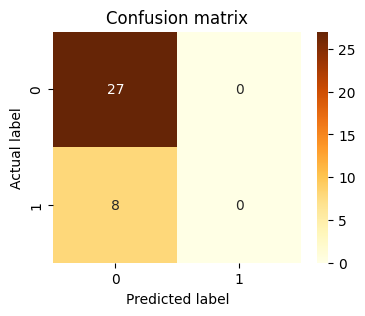

In [43]:
plt.figure(figsize = [4,3])

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='YlOrBr')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [44]:
accuracy_score(y_test, y_pred)

0.7714285714285715

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        27
           1       0.00      0.00      0.00         8

    accuracy                           0.77        35
   macro avg       0.39      0.50      0.44        35
weighted avg       0.60      0.77      0.67        35



C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5. Discretization

In [46]:
X = df.iloc[:, 0:8]

disc = KBinsDiscretizer(n_bins=5, strategy='uniform', encode='ordinal')
X = disc.fit_transform(X)

C:\Work\Project_1\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Work\Project_1\lib\site-packages\sklearn\preprocessing\_discretization.py:278: UserWarning: Feature 2 is constant and will be replaced with 0.
  warnings.warn(


In [47]:
X[0:10]

array([[2., 0., 0., 2., 4., 4., 4., 4.],
       [2., 4., 0., 4., 4., 4., 4., 2.],
       [4., 0., 0., 4., 4., 4., 2., 2.],
       [2., 0., 0., 4., 4., 0., 2., 4.],
       [2., 2., 0., 4., 4., 4., 4., 2.],
       [4., 0., 0., 2., 4., 4., 0., 4.],
       [2., 0., 0., 4., 4., 4., 2., 0.],
       [4., 2., 0., 2., 0., 0., 4., 2.],
       [2., 4., 0., 2., 4., 4., 4., 2.],
       [2., 0., 0., 2., 0., 4., 2., 2.]])

## 6. Running Decision Tree

The outcomes were the same for both criteria: entropy and gini. Usually, the outcomes for the two scenarios are comparable. However, it is recommended to utilize gini with huge datasets because it requires less computing power.

The model performed the best when the max_depth was 7.

Accuracy:  0.7142857142857143
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.33      0.25      0.29         8

    accuracy                           0.71        35
   macro avg       0.56      0.55      0.55        35
weighted avg       0.69      0.71      0.70        35



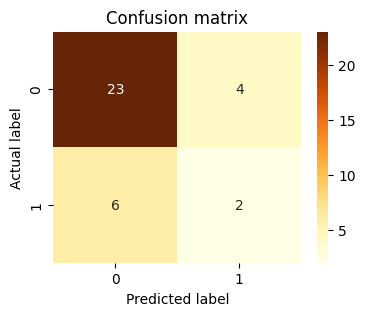

In [48]:
classifier =  DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
    
plt.figure(figsize = [4,3])

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='YlOrBr')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
    
    
print('Accuracy: ' , accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7142857142857143
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.33      0.25      0.29         8

    accuracy                           0.71        35
   macro avg       0.56      0.55      0.55        35
weighted avg       0.69      0.71      0.70        35



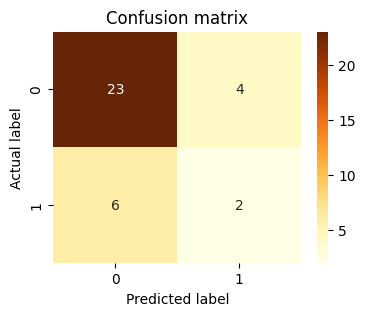

In [49]:
classifier =  DecisionTreeClassifier(criterion = 'gini')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
    
plt.figure(figsize = [4,3])

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='YlOrBr')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
    
    
print('Accuracy: ' , accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [50]:
def clf(max_depth):
    classifier =  DecisionTreeClassifier(max_depth = max_depth)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    plt.figure(figsize = [4,3])

    sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='YlOrBr')
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    
    print('Accuracy: ' , accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    plt.figure(figsize = [12,9])
    tree.plot_tree(classifier, filled = True, feature_names = df.columns, class_names = df.columns)

Accuracy:  0.6857142857142857
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.00      0.00      0.00         8

    accuracy                           0.69        35
   macro avg       0.38      0.44      0.41        35
weighted avg       0.58      0.69      0.63        35



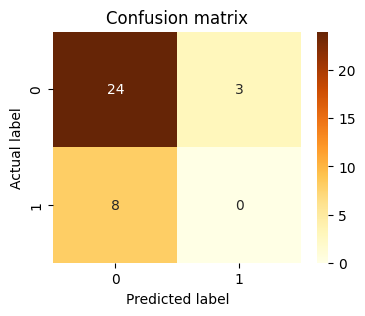

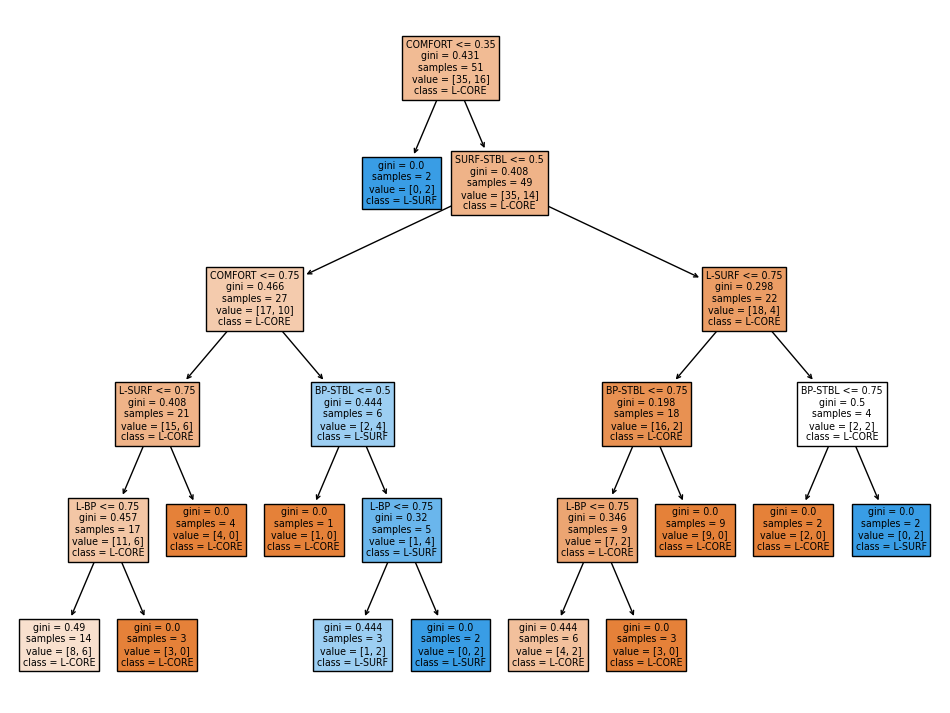

In [51]:
clf(5)

Accuracy:  0.7142857142857143
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.25      0.12      0.17         8

    accuracy                           0.71        35
   macro avg       0.51      0.51      0.50        35
weighted avg       0.65      0.71      0.68        35



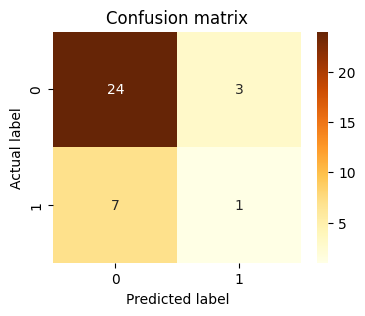

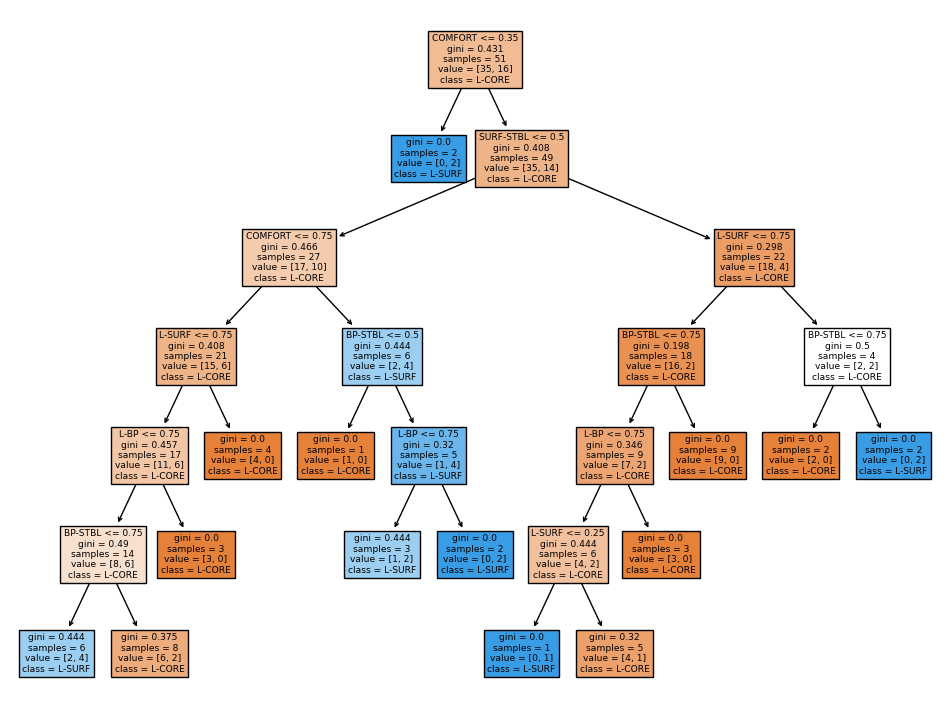

In [52]:
clf(6)

Accuracy:  0.7428571428571429
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.40      0.25      0.31         8

    accuracy                           0.74        35
   macro avg       0.60      0.57      0.57        35
weighted avg       0.71      0.74      0.72        35



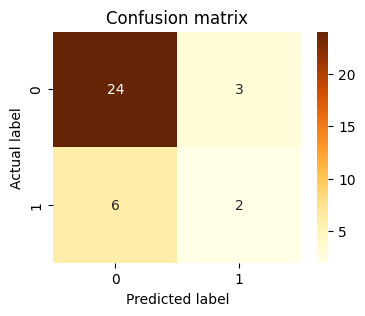

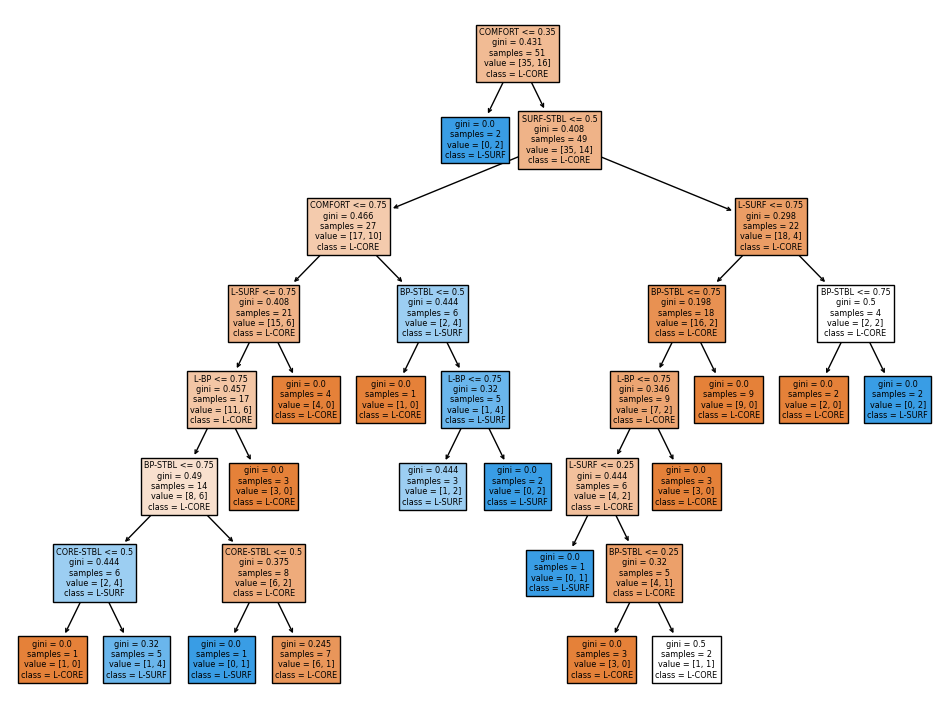

In [53]:
clf(7)

Accuracy:  0.7142857142857143
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.33      0.25      0.29         8

    accuracy                           0.71        35
   macro avg       0.56      0.55      0.55        35
weighted avg       0.69      0.71      0.70        35



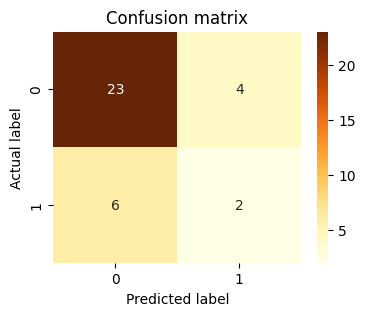

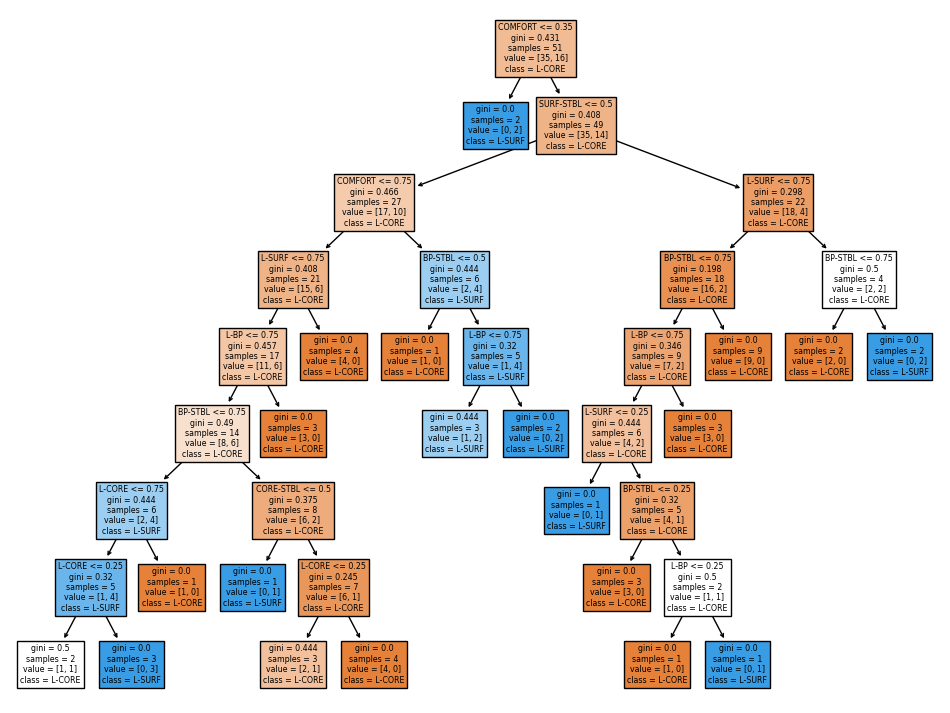

In [54]:
clf(8)

Accuracy:  0.7142857142857143
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.33      0.25      0.29         8

    accuracy                           0.71        35
   macro avg       0.56      0.55      0.55        35
weighted avg       0.69      0.71      0.70        35



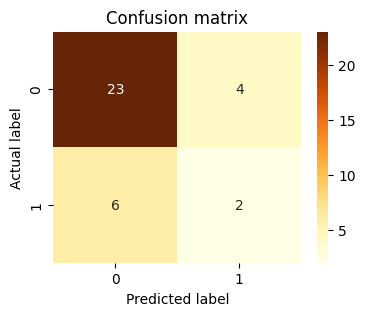

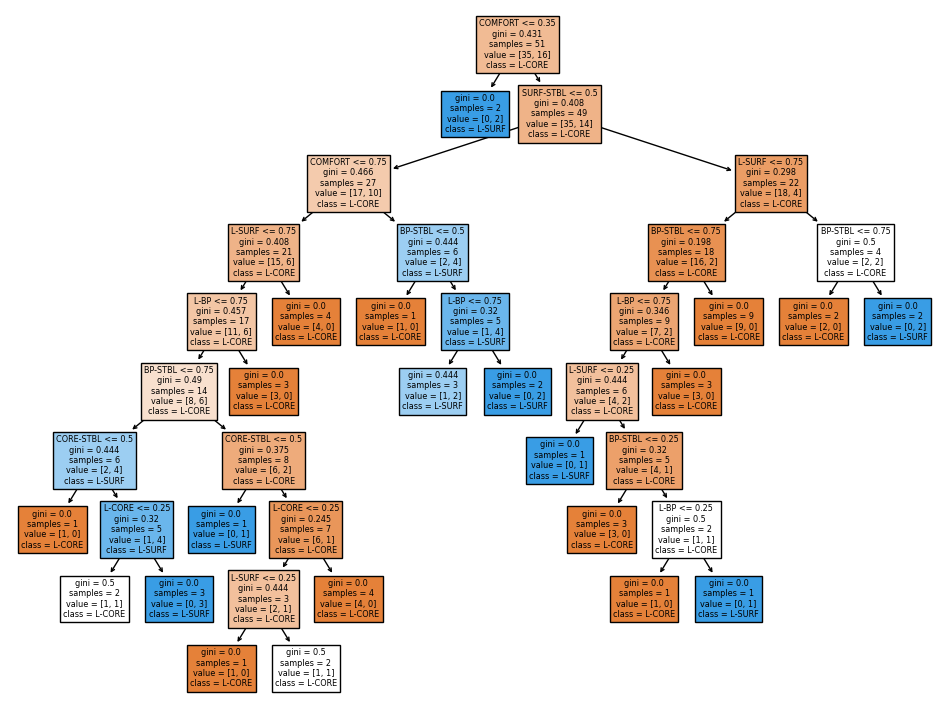

In [55]:
clf(9)

# EXTRA CREDIT

I'm concentrating on the lung cancer dataset for my project.  It has three variables in the label class and fifty-six features. Since it is meaningless, the 'id' feature has been eliminated from the dataframe. There are 32 observations in the dataset, with 9 in class 1, 13 in class 2, and 10 in class 3. The null values were filled by both forward and backward fill since there were consecutive null values.

In [56]:
df = pd.read_csv("C:\Class\Computational Foundation of AI\csv_result-lung-cancer.csv")
df.head()

id  class  attribute2  attribute3  attribute4 attribute5  attribute6  \
0   1      1           0           3           0          ?           0   
1   2      1           0           3           3          1           0   
2   3      1           0           3           3          2           0   
3   4      1           0           2           3          2           1   
4   5      1           0           3           2          1           1   

   attribute7  attribute8  attribute9  ...  attribute48  attribute49  \
0           2           2           2  ...            2            2   
1           3           1           3  ...            2            2   
2           3           3           3  ...            2            2   
3           3           3           3  ...            2            2   
4           3           3           3  ...            2            2   

   attribute50  attribute51  attribute52  attribute53  attribute54  \
0            2            2            2            1            1   
1            2            2            2            2            2   
2            2            2            2            2            2   
3            2            2            2            2            2   
4            2            2            2            2            2   

   attribute55  attribute56  attribute57  
0            1            2            2  
1            1            2            2  
2            2            1            2  
3            2            2            2  
4            1            2            2  

[5 rows x 58 columns]

In [57]:
df.columns

Index(['id', 'class', 'attribute2', 'attribute3', 'attribute4', 'attribute5',
       'attribute6', 'attribute7', 'attribute8', 'attribute9', 'attribute10',
       'attribute11', 'attribute12', 'attribute13', 'attribute14',
       'attribute15', 'attribute16', 'attribute17', 'attribute18',
       'attribute19', 'attribute20', 'attribute21', 'attribute22',
       'attribute23', 'attribute24', 'attribute25', 'attribute26',
       'attribute27', 'attribute28', 'attribute29', 'attribute30',
       'attribute31', 'attribute32', 'attribute33', 'attribute34',
       'attribute35', 'attribute36', 'attribute37', 'attribute38',
       'attribute39', 'attribute40', 'attribute41', 'attribute42',
       'attribute43', 'attribute44', 'attribute45', 'attribute46',
       'attribute47', 'attribute48', 'attribute49', 'attribute50',
       'attribute51', 'attribute52', 'attribute53', 'attribute54',
       'attribute55', 'attribute56', 'attribute57'],
      dtype='object')

In [58]:
df.drop(['id'], axis = 1, inplace = True)

In [59]:
df

class  attribute2  attribute3  attribute4 attribute5  attribute6  \
0       1           0           3           0          ?           0   
1       1           0           3           3          1           0   
2       1           0           3           3          2           0   
3       1           0           2           3          2           1   
4       1           0           3           2          1           1   
5       1           0           3           3          2           0   
6       1           0           3           2          1           0   
7       1           0           2           2          1           0   
8       1           0           3           1          1           0   
9       2           0           2           3          2           0   
10      2           0           2           2          0           0   
11      2           0           2           3          2           0   
12      2           0           2           1          1           0   
13      2           0           2           2          1           1   
14      2           1           3           0          ?           1   
15      2           0           3           2          2           1   
16      2           0           3           2          2           0   
17      2           0           2           1          1           0   
18      2           0           2           0          ?           0   
19      2           0           1           2          1           0   
20      2           0           2           0          ?           1   
21      2           0           3           3          2           0   
22      3           0           2           3          1           1   
23      3           0           2           3          1           1   
24      3           0           3           3          1           0   
25      3           0           2           3          2           0   
26      3           0           2           2          2           0   
27      3           0           2           2          1           0   
28      3           0           3           2          2           0   
29      3           0           2           1          1           0   
30      3           0           2           3          2           1   
31      3           0           2           3          1           0   

    attribute7  attribute8  attribute9  attribute10  ...  attribute48  \
0            2           2           2            1  ...            2   
1            3           1           3            1  ...            2   
2            3           3           3            1  ...            2   
3            3           3           3            1  ...            2   
4            3           3           3            2  ...            2   
5            3           3           3            1  ...            2   
6            3           3           3            1  ...            2   
7            3           1           3            3  ...            2   
8            3           1           3            1  ...            2   
9            2           2           2            1  ...            2   
10           3           2           3            1  ...            2   
11           1           2           1            1  ...            2   
12           1           2           2            1  ...            2   
13           2           3           3            1  ...            2   
14           1           2           2            1  ...            2   
15           2           2           2            1  ...            2   
16           1           1           3            1  ...            2   
17           2           1           3            1  ...            2   
18           2           3           3            3  ...            2   
19           3           3           3            1  ...            2   
20           3           3           3            1  ...            2   
21           2       

C:\Users\manis\AppData\Local\Temp\ipykernel_3196\750833575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'class', data = df, palette = 'afmhot')


<Axes: xlabel='class', ylabel='count'>

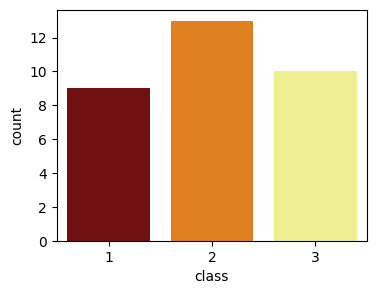

In [60]:
plt.figure( figsize = [4,3])

sns.countplot(x = 'class', data = df, palette = 'afmhot')


> **Dealing with missing values**

In [61]:
df.replace('?', np.nan, inplace=True)

In [62]:
# Percentage of null values in a feature
(df.isna().sum()/len(df)) * 100

class           0.000
attribute2      0.000
attribute3      0.000
attribute4      0.000
attribute5     12.500
attribute6      0.000
attribute7      0.000
attribute8      0.000
attribute9      0.000
attribute10     0.000
attribute11     0.000
attribute12     0.000
attribute13     0.000
attribute14     0.000
attribute15     0.000
attribute16     0.000
attribute17     0.000
attribute18     0.000
attribute19     0.000
attribute20     0.000
attribute21     0.000
attribute22     0.000
attribute23     0.000
attribute24     0.000
attribute25     0.000
attribute26     0.000
attribute27     0.000
attribute28     0.000
attribute29     0.000
attribute30     0.000
attribute31     0.000
attribute32     0.000
attribute33     0.000
attribute34     0.000
attribute35     0.000
attribute36     0.000
attribute37     0.000
attribute38     0.000
attribute39     3.125
attribute40     0.000
attribute41     0.000
attribute42     0.000
attribute43     0.000
attribute44     0.000
attribute45     0.000
attribute4

In [63]:
df.fillna(method = 'ffill', inplace = True)
df.fillna(method = 'bfill', inplace = True)

### Explaratory Data Analysis

In [64]:
df.head(10)

class  attribute2  attribute3  attribute4 attribute5  attribute6  \
0      1           0           3           0          1           0   
1      1           0           3           3          1           0   
2      1           0           3           3          2           0   
3      1           0           2           3          2           1   
4      1           0           3           2          1           1   
5      1           0           3           3          2           0   
6      1           0           3           2          1           0   
7      1           0           2           2          1           0   
8      1           0           3           1          1           0   
9      2           0           2           3          2           0   

   attribute7  attribute8  attribute9  attribute10  ...  attribute48  \
0           2           2           2            1  ...            2   
1           3           1           3            1  ...            2   
2           3           3           3            1  ...            2   
3           3           3           3            1  ...            2   
4           3           3           3            2  ...            2   
5           3           3           3            1  ...            2   
6           3           3           3            1  ...            2   
7           3           1           3            3  ...            2   
8           3           1           3            1  ...            2   
9           2           2           2            1  ...            2   

   attribute49  attribute50  attribute51  attribute52  attribute53  \
0            2            2            2            2            1   
1            2            2            2            2            2   
2            2            2            2            2            2   
3            2            2            2            2            2   
4            2            2            2            2            2   
5            2            2            2            2            2   
6            2            2            2            1            2   
7            2            1            2            2            2   
8            2            2            2            2            2   
9            2            2            1            3            2   

   attribute54  attribute55  attribute56  attribute57  
0            1            1            2            2  
1            2            1            2            2  
2            2            2            1            2  
3            2            2            2            2  
4            2            1            2            2  
5            2            2            1            2  
6            2            2            1            2  
7            2            1            2            2  
8            2            1            2            2  
9            1            1            2            2  

[10 rows x 57 columns]

In [65]:
df.shape

(32, 57)

In [66]:
df.describe()

class  attribute2  attribute3  attribute4  attribute6  attribute7  \
count  32.000000   32.000000   32.000000   32.000000   32.000000   32.000000   
mean    2.031250    0.031250    2.375000    2.031250    0.281250    2.187500   
std     0.782237    0.176777    0.553581    1.031265    0.456803    0.737804   
min     1.000000    0.000000    1.000000    0.000000    0.000000    1.000000   
25%     1.000000    0.000000    2.000000    1.750000    0.000000    2.000000   
50%     2.000000    0.000000    2.000000    2.000000    0.000000    2.000000   
75%     3.000000    0.000000    3.000000    3.000000    1.000000    3.000000   
max     3.000000    1.000000    3.000000    3.000000    1.000000    3.000000   

       attribute8  attribute9  attribute10  attribute11  ...  attribute48  \
count   32.000000   32.000000    32.000000    32.000000  ...    32.000000   
mean     2.125000    2.406250     1.156250     1.406250  ...     2.062500   
std      0.751343    0.756024     0.514899     0.559918  ...     0.245935   
min      1.000000    1.000000     1.000000     1.000000  ...     2.000000   
25%      2.000000    2.000000     1.000000     1.000000  ...     2.000000   
50%      2.000000    3.000000     1.000000     1.000000  ...     2.000000   
75%      3.000000    3.000000     1.000000     2.000000  ...     2.000000   
max      3.000000    3.000000     3.000000     3.000000  ...     3.000000   

       attribute49  attribute50  attribute51  attribute52  attribute53  \
count    32.000000    32.000000    32.000000    32.000000    32.000000   
mean      2.062500     2.000000     2.000000     2.000000     1.843750   
std       0.245935     0.359211     0.359211     0.508001     0.447889   
min       2.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       2.000000     2.000000     2.000000     2.000000     2.000000   
75%       2.000000     2.000000     2.000000     2.000000     2.000000   
max       3.000000     3.000000     3.000000     3.000000     3.000000   

       attribute54  attribute55  attribute56  attribute57  
count    32.000000    32.000000    32.000000    32.000000  
mean      1.843750     1.562500     1.812500     1.718750  
std       0.447889     0.504016     0.396558     0.456803  
min       1.000000     1.000000     1.000000     1.000000  
25%       2.000000     1.000000     2.000000     1.000000  
50%       2.000000     2.000000     2.000000     2.000000  
75%       2.000000     2.000000     2.000000     2.000000  
max       3.000000     2.000000     2.000000     2.000000  

[8 rows x 55 columns]

> **Histogram**

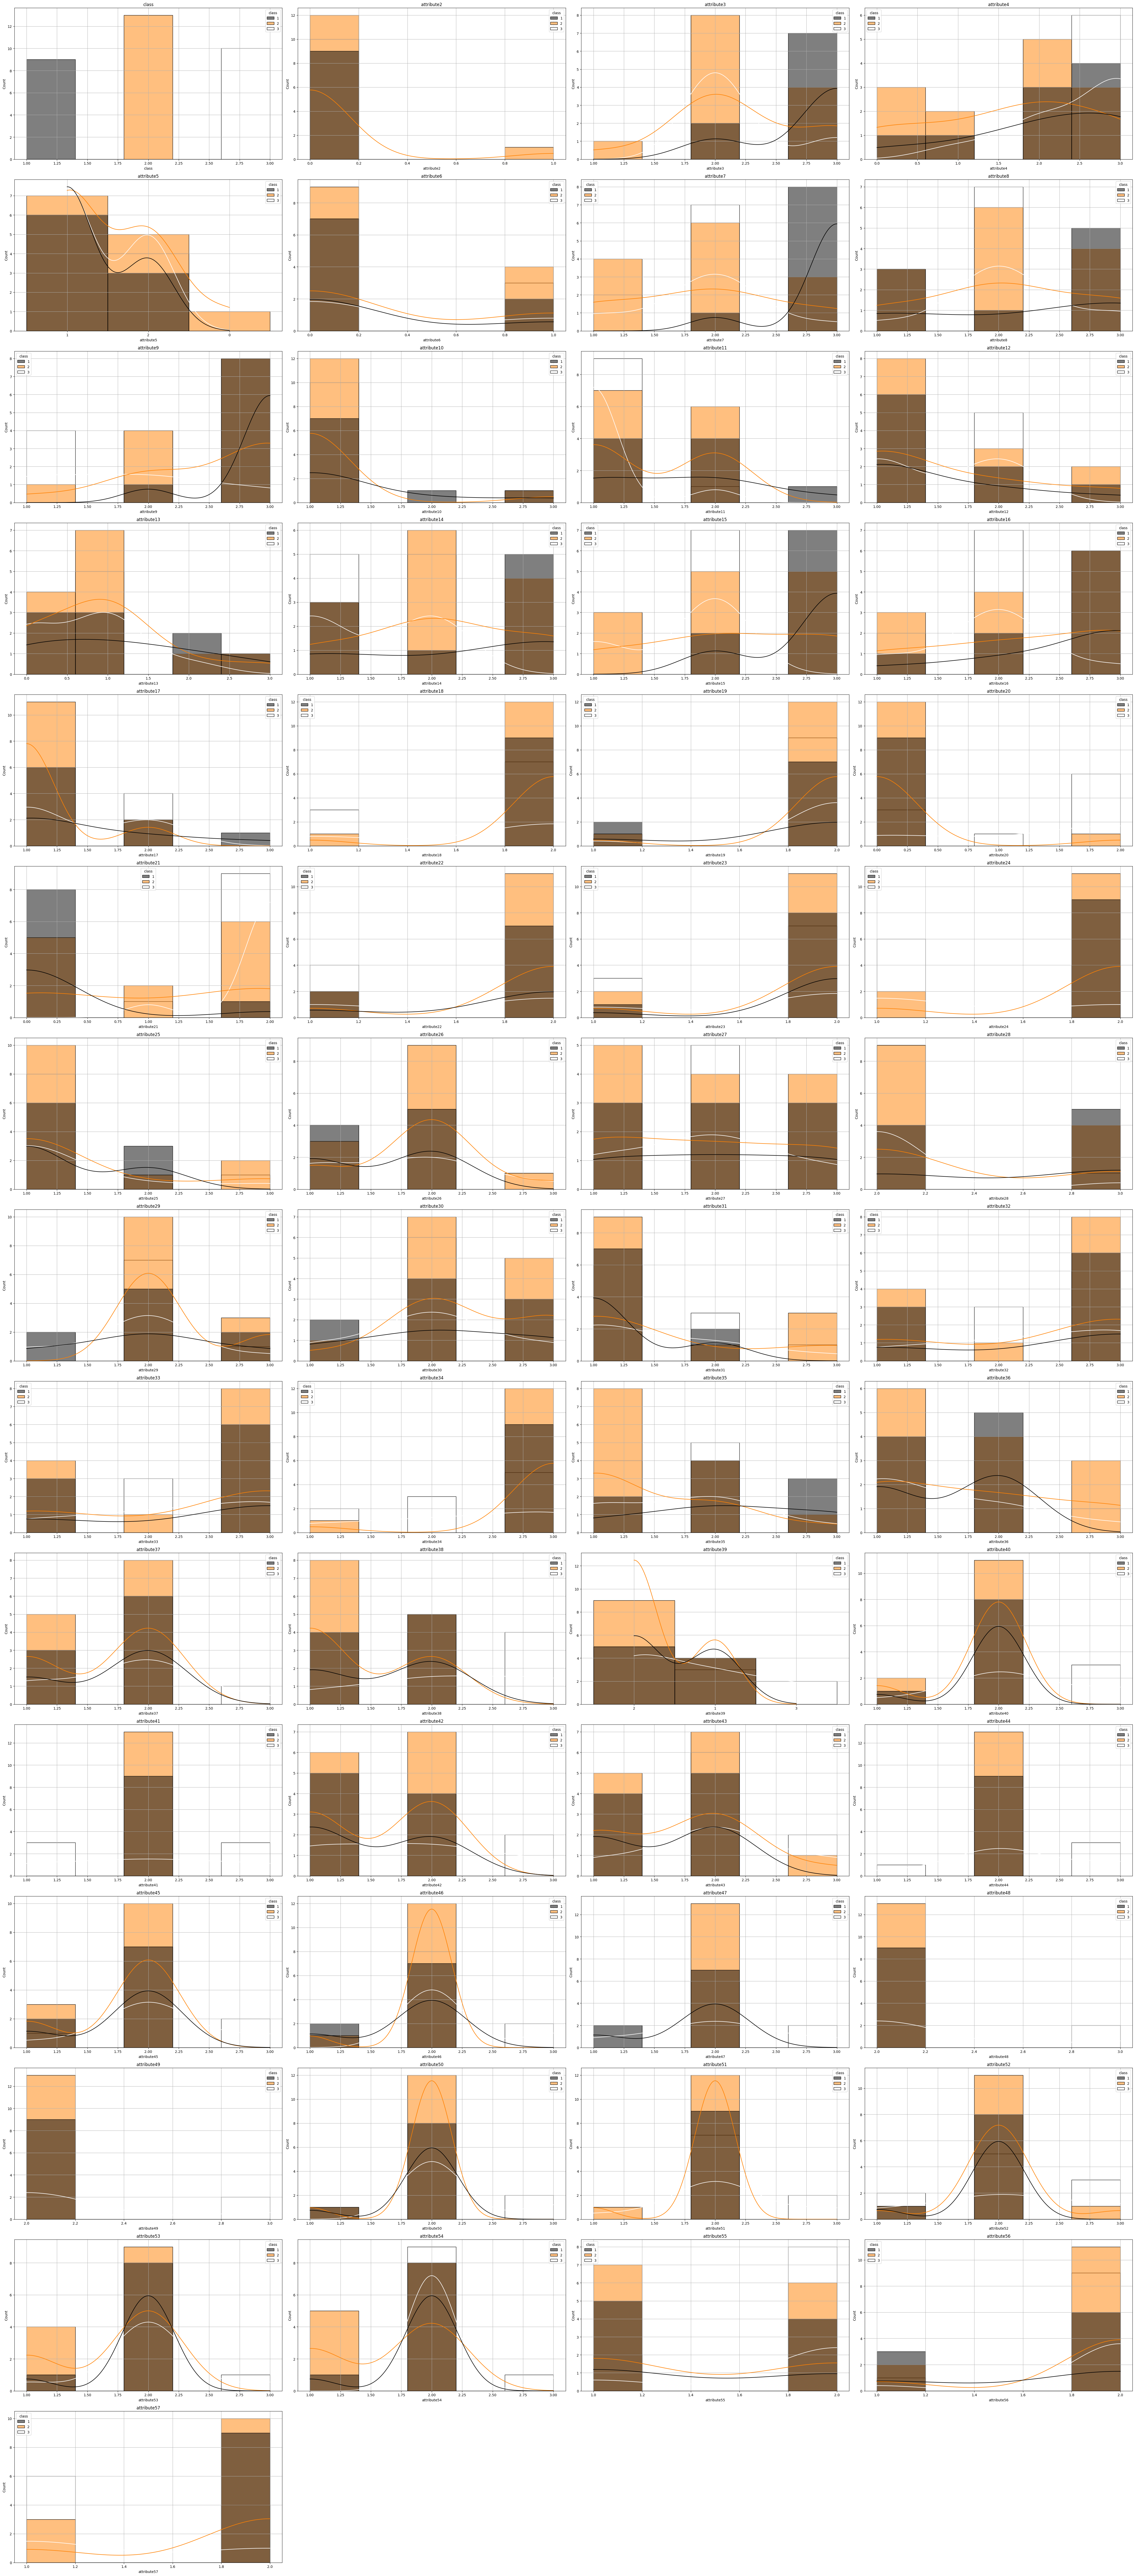

In [67]:
plt.figure(figsize = [45,102])
i = 1

name = df.columns
j = 0

for col in df:    
    plt.subplot(15, 4, i)
    sns.histplot( data = df, x = df[col], hue ='class', palette = 'afmhot', bins = int(math.sqrt(len(df))), kde = True)
    plt.title(name[j])
    plt.tight_layout()
    plt.grid()
    
    i = i+1
    j = j+1
     

> **Countplot**

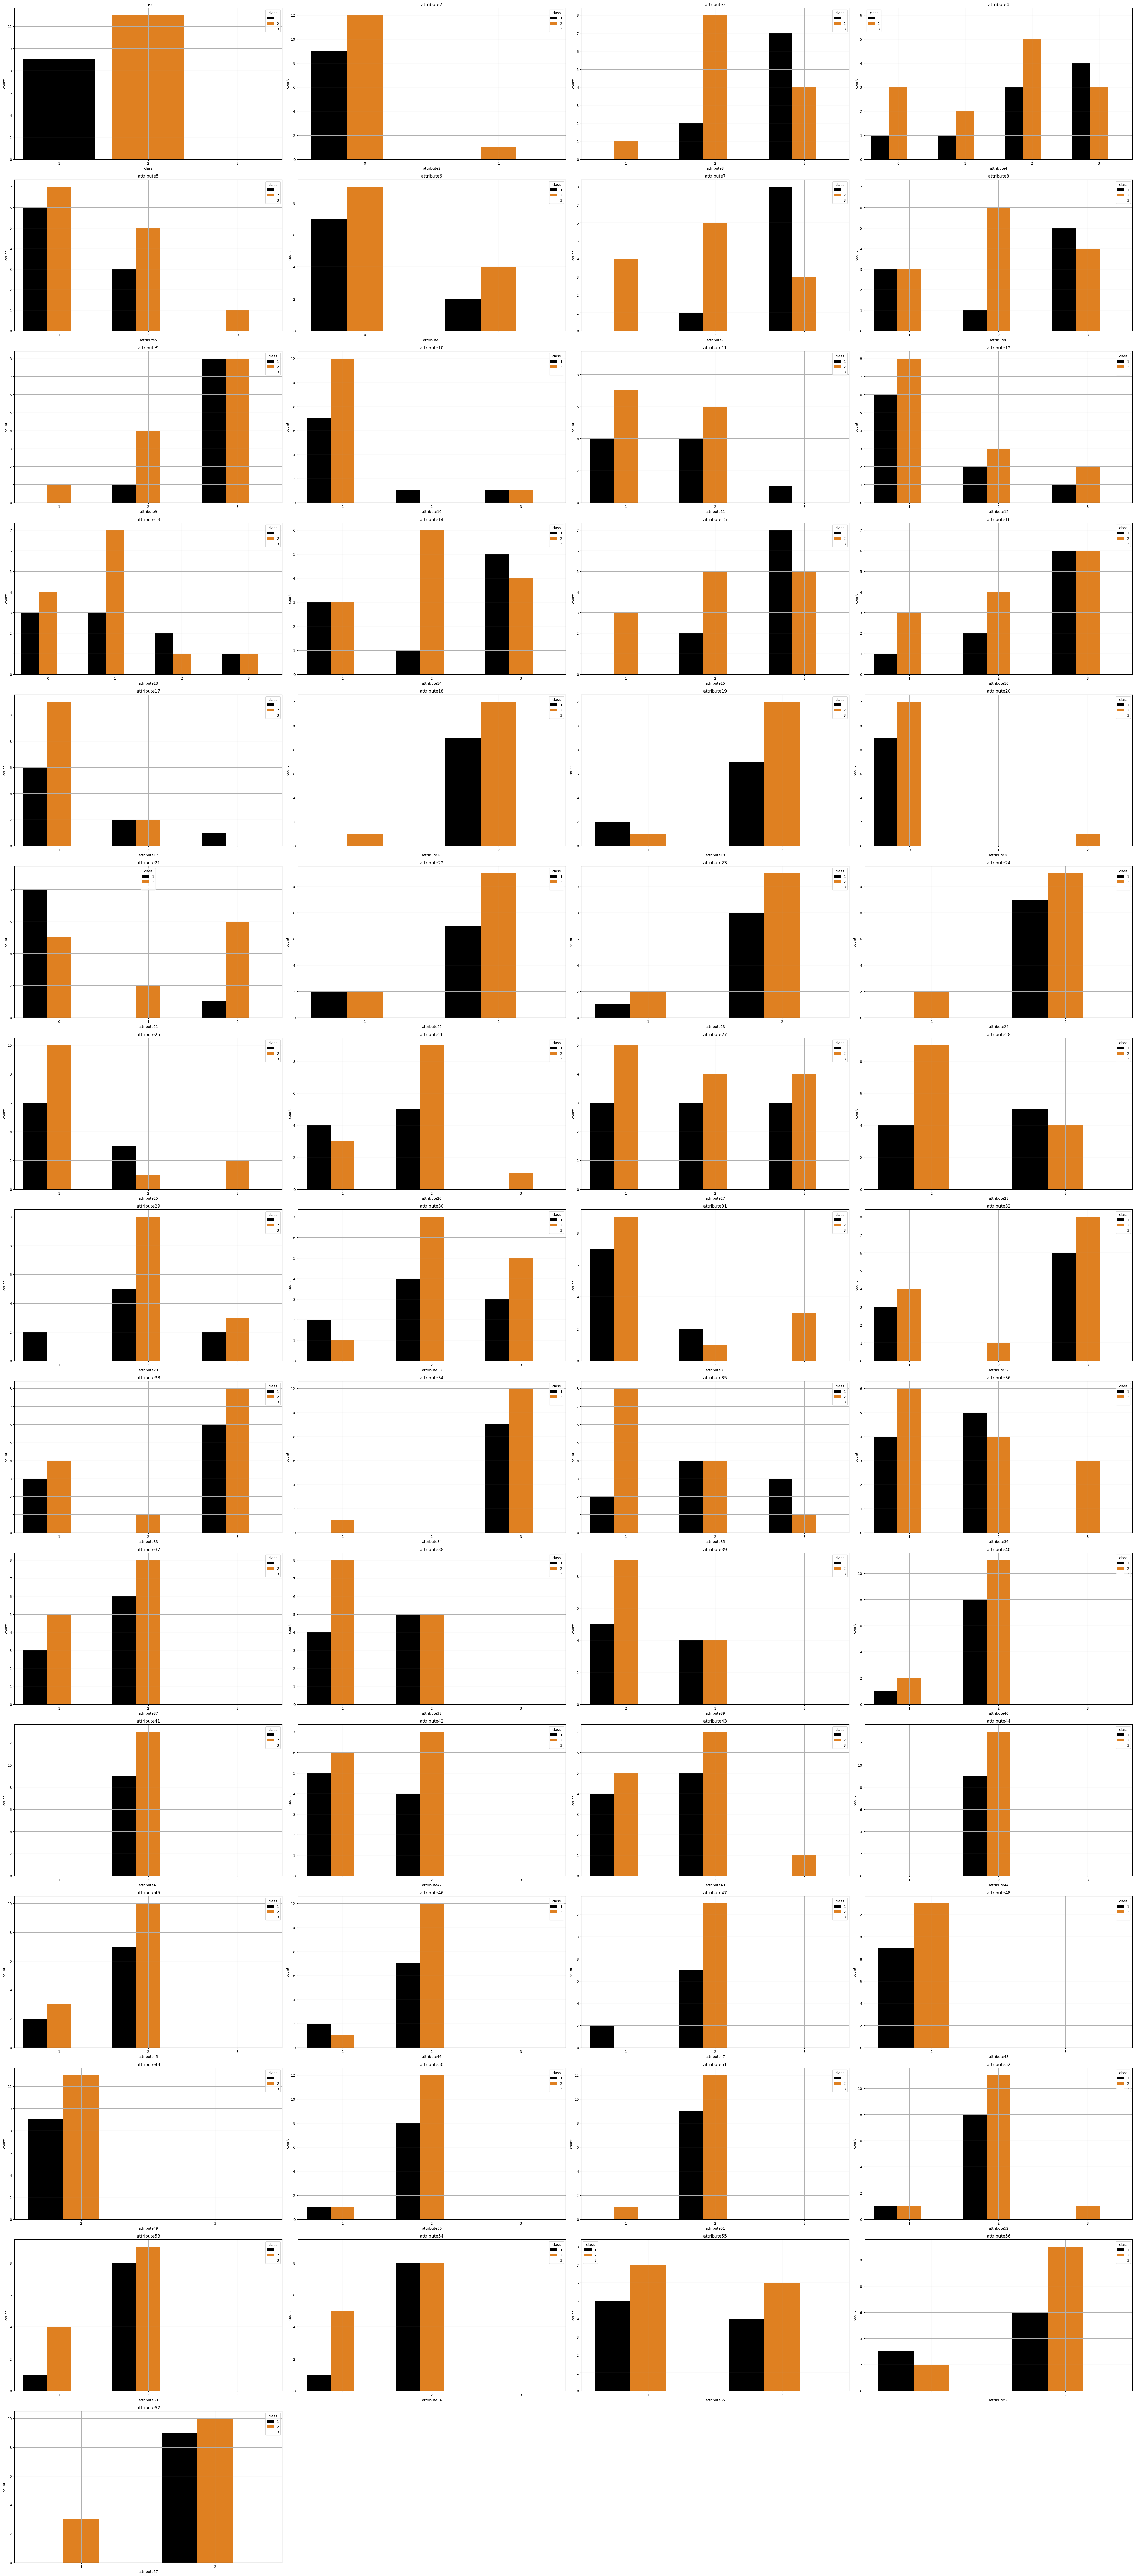

In [68]:
plt.figure(figsize = [45,102])
i = 1

name = df.columns
j = 0

for col in df:    
    plt.subplot(15, 4, i)
    sns.countplot( data = df, x = df[col], hue ='class', palette = 'afmhot')
    plt.title(name[j])
    plt.tight_layout()
    plt.grid()
    
    i = i+1
    j = j+1
     

> Encoding

In [69]:
df = df.astype(int)

In [70]:
df.describe()

class  attribute2  attribute3  attribute4  attribute5  attribute6  \
count  32.000000   32.000000   32.000000   32.000000   32.000000   32.000000   
mean    2.031250    0.031250    2.375000    2.031250    1.343750    0.281250   
std     0.782237    0.176777    0.553581    1.031265    0.545325    0.456803   
min     1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%     1.000000    0.000000    2.000000    1.750000    1.000000    0.000000   
50%     2.000000    0.000000    2.000000    2.000000    1.000000    0.000000   
75%     3.000000    0.000000    3.000000    3.000000    2.000000    1.000000   
max     3.000000    1.000000    3.000000    3.000000    2.000000    1.000000   

       attribute7  attribute8  attribute9  attribute10  ...  attribute48  \
count   32.000000   32.000000   32.000000    32.000000  ...    32.000000   
mean     2.187500    2.125000    2.406250     1.156250  ...     2.062500   
std      0.737804    0.751343    0.756024     0.514899  ...     0.245935   
min      1.000000    1.000000    1.000000     1.000000  ...     2.000000   
25%      2.000000    2.000000    2.000000     1.000000  ...     2.000000   
50%      2.000000    2.000000    3.000000     1.000000  ...     2.000000   
75%      3.000000    3.000000    3.000000     1.000000  ...     2.000000   
max      3.000000    3.000000    3.000000     3.000000  ...     3.000000   

       attribute49  attribute50  attribute51  attribute52  attribute53  \
count    32.000000    32.000000    32.000000    32.000000    32.000000   
mean      2.062500     2.000000     2.000000     2.000000     1.843750   
std       0.245935     0.359211     0.359211     0.508001     0.447889   
min       2.000000     1.000000     1.000000     1.000000     1.000000   
25%       2.000000     2.000000     2.000000     2.000000     2.000000   
50%       2.000000     2.000000     2.000000     2.000000     2.000000   
75%       2.000000     2.000000     2.000000     2.000000     2.000000   
max       3.000000     3.000000     3.000000     3.000000     3.000000   

       attribute54  attribute55  attribute56  attribute57  
count    32.000000    32.000000    32.000000    32.000000  
mean      1.843750     1.562500     1.812500     1.718750  
std       0.447889     0.504016     0.396558     0.456803  
min       1.000000     1.000000     1.000000     1.000000  
25%       2.000000     1.000000     2.000000     1.000000  
50%       2.000000     2.000000     2.000000     2.000000  
75%       2.000000     2.000000     2.000000     2.000000  
max       3.000000     2.000000     2.000000     2.000000  

[8 rows x 57 columns]

In [71]:
df.head()

class  attribute2  attribute3  attribute4  attribute5  attribute6  \
0      1           0           3           0           1           0   
1      1           0           3           3           1           0   
2      1           0           3           3           2           0   
3      1           0           2           3           2           1   
4      1           0           3           2           1           1   

   attribute7  attribute8  attribute9  attribute10  ...  attribute48  \
0           2           2           2            1  ...            2   
1           3           1           3            1  ...            2   
2           3           3           3            1  ...            2   
3           3           3           3            1  ...            2   
4           3           3           3            2  ...            2   

   attribute49  attribute50  attribute51  attribute52  attribute53  \
0            2            2            2            2            1   
1            2            2            2            2            2   
2            2            2            2            2            2   
3            2            2            2            2            2   
4            2            2            2            2            2   

   attribute54  attribute55  attribute56  attribute57  
0            1            1            2            2  
1            2            1            2            2  
2            2            2            1            2  
3            2            2            2            2  
4            2            1            2            2  

[5 rows x 57 columns]

In [72]:
df.shape

(32, 57)

### 2. Normalize

In [73]:
X = df.iloc[:, 1:]
y = df['class']

In [74]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [75]:
X[0:10]

array([[0.        , 1.        , 0.        , 0.5       , 0.        ,
        0.5       , 0.5       , 0.5       , 0.        , 0.        ,
        0.        , 0.33333333, 1.        , 0.5       , 0.5       ,
        0.        , 1.        , 1.        , 0.        , 1.        ,
        1.        , 1.        , 1.        , 0.        , 0.5       ,
        0.5       , 0.        , 1.        , 0.5       , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.5       ,
        0.5       , 0.        , 0.5       , 0.5       , 0.5       ,
        0.        , 0.5       , 0.5       , 0.5       , 0.5       ,
        0.5       , 0.        , 0.        , 0.5       , 0.5       ,
        0.5       , 0.        , 0.        , 0.        , 1.        ,
        1.        ],
       [0.        , 1.        , 1.        , 0.5       , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.33333333, 0.        , 1.        , 1.        ,
        0.        , 1.     

## 3. Divide_train_test

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y ,random_state=104,  test_size=0.40,  shuffle=True) 

In [77]:
print('Shape of X_train: ',  X_train.shape)
print('Shape of y_train: ',  y_train.shape)

print('Shape of X_test: ',  X_test.shape)
print('Shape of y_test: ',  y_test.shape)

Shape of X_train:  (19, 56)
Shape of y_train:  (19,)
Shape of X_test:  (13, 56)
Shape of y_test:  (13,)


## 4. Running Logistic Regression


The accuracy of the model improved when L1 and elastic regularization were used. The reason being that this dataset had 56 features and the L1 regularization had removed the irrelevant features.

> **Penalty = L2**

In [78]:
classifier = LogisticRegression(multi_class='ovr',penalty = 'l2', solver = 'liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [79]:
print('coefficient: ',classifier.coef_)
print('interceopt: ', classifier.intercept_ )

coefficient:  [[-0.10635072  0.14281856 -0.29273742 -0.3032279  -0.18351728  0.91636282
   0.13216899  0.19745151  0.23491961  0.36978589 -0.20714223 -0.06444124
   0.39694264  0.39552927  0.1327573   0.13818415  0.1097913  -0.28466387
  -0.4307213  -0.82128911 -0.2367124   0.03694014  0.50329279  0.19494606
  -0.11512327  0.2280956   0.32493175 -0.0043182  -0.13995379 -0.53728184
  -0.18928675 -0.18928675  0.09623608  0.19564813 -0.09234747  0.09744219
  -0.3503454  -0.07444022  0.08137975 -0.08254856 -0.1828617  -0.04521454
  -0.11432124 -0.27345072 -0.03138806 -0.24731991 -0.09876798 -0.09876798
  -0.00318719 -0.03882642 -0.25740554  0.13179957  0.05630475 -0.30745289
  -0.04575326  0.36504374]
 [ 0.21909773 -0.14318376  0.10151018  0.23027431  0.46264549 -1.01246737
  -0.29056378  0.07476221 -0.16154184 -0.24145618  0.09431826  0.07992802
  -0.16936577 -0.0862371   0.09549527 -0.33597903  0.1646108  -0.14577897
  -0.48410604  0.34989988  0.30878124  0.3672137  -0.20599515 -0.228128

In [80]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0],
       [7, 0, 1],
       [1, 1, 3]], dtype=int64)

Text(0.5, 3.722222222222216, 'Predicted label')

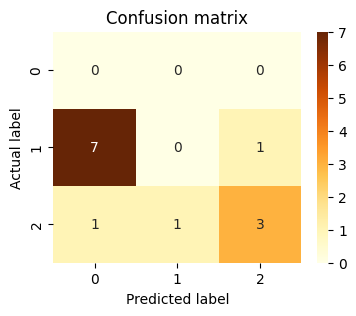

In [81]:
plt.figure(figsize = [4,3])

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='YlOrBr')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [82]:
accuracy_score(y_test, y_pred)

0.23076923076923078

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         8
           3       0.75      0.60      0.67         5

    accuracy                           0.23        13
   macro avg       0.25      0.20      0.22        13
weighted avg       0.29      0.23      0.26        13



C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> **Penalty = L1**

In [84]:
classifier = LogisticRegression(multi_class='ovr', penalty = 'l1', solver = 'liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [85]:
print('coefficient: ',classifier.coef_)
print('interceopt: ', classifier.intercept_ )

coefficient:  [[ 0.          0.          0.          0.          0.          1.11135725
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.         -1.85583406  0.          0.          0.24907262  0.
   0.          0.          0.          0.          0.         -0.14134034
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.10972758
   0.          0.        ]
 [ 0.          0.          0.          0.          0.         -2.02115899
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
  -0.30600029  0.          0.          0.18407684  0.          0.
   0.          0.          0.          0.          0.          0.
   

In [86]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0],
       [6, 1, 1],
       [0, 2, 3]], dtype=int64)

Text(0.5, 3.722222222222216, 'Predicted label')

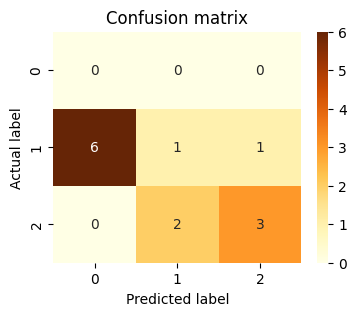

In [87]:
plt.figure(figsize = [4,3])

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='YlOrBr')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [88]:
accuracy_score(y_test, y_pred)

0.3076923076923077

In [89]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.33      0.12      0.18         8
           3       0.75      0.60      0.67         5

    accuracy                           0.31        13
   macro avg       0.36      0.24      0.28        13
weighted avg       0.49      0.31      0.37        13



C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> **Penalty = Elastic Net**

In [90]:
classifier = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

C:\Work\Project_1\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [91]:
print('coefficient: ',classifier.coef_)
print('interceopt: ', classifier.intercept_ )

coefficient:  [[ 0.          0.         -0.01988096  0.          0.          0.95688637
   0.          0.          0.          0.13392493  0.          0.
   0.22317523  0.17113275  0.          0.          0.          0.
  -0.21176501 -0.69164328  0.          0.          0.47164121  0.
   0.          0.05911973  0.03619884  0.          0.         -0.32340089
   0.          0.          0.          0.01737434  0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -0.11313573
   0.          0.35406928]
 [ 0.          0.          0.          0.02924082  0.30771937 -0.88809433
  -0.01084094  0.          0.          0.          0.          0.
   0.          0.          0.         -0.17997873  0.0279227   0.
  -0.30849152  0.00592418  0.18445739  0.24657039  0.          0.
   0.         -0.19930552  0.          0.          0.06641869  0.1928

In [92]:
confusion_matrix(y_test, y_pred)

array([[0, 0, 0],
       [6, 1, 1],
       [1, 1, 3]], dtype=int64)

Text(0.5, 3.722222222222216, 'Predicted label')

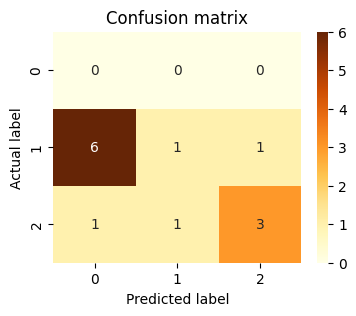

In [93]:
plt.figure(figsize = [4,3])

sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot=True, cmap='YlOrBr')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [94]:
accuracy_score(y_test, y_pred)

0.3076923076923077

In [95]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.50      0.12      0.20         8
           3       0.75      0.60      0.67         5

    accuracy                           0.31        13
   macro avg       0.42      0.24      0.29        13
weighted avg       0.60      0.31      0.38        13



C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Work\Project_1\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
